In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
features = train['LotArea']
features = features[:1000]
features

0       8450
1       9600
2      11250
3       9550
4      14260
       ...  
995     4712
996    10659
997    11717
998     9786
999     6762
Name: LotArea, Length: 1000, dtype: int64

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [6]:
train_x = features[:800].to_numpy().reshape(-1, 1)
train_x

array([[  8450],
       [  9600],
       [ 11250],
       [  9550],
       [ 14260],
       [ 14115],
       [ 10084],
       [ 10382],
       [  6120],
       [  7420],
       [ 11200],
       [ 11924],
       [ 12968],
       [ 10652],
       [ 10920],
       [  6120],
       [ 11241],
       [ 10791],
       [ 13695],
       [  7560],
       [ 14215],
       [  7449],
       [  9742],
       [  4224],
       [  8246],
       [ 14230],
       [  7200],
       [ 11478],
       [ 16321],
       [  6324],
       [  8500],
       [  8544],
       [ 11049],
       [ 10552],
       [  7313],
       [ 13418],
       [ 10859],
       [  8532],
       [  7922],
       [  6040],
       [  8658],
       [ 16905],
       [  9180],
       [  9200],
       [  7945],
       [  7658],
       [ 12822],
       [ 11096],
       [  4456],
       [  7742],
       [ 13869],
       [  6240],
       [  8472],
       [ 50271],
       [  7134],
       [ 10175],
       [  2645],
       [ 11645],
       [ 13682

In [7]:
label = train['SalePrice']
label = label[:1000]
label

0      208500
1      181500
2      223500
3      140000
4      250000
        ...  
995    121600
996    136500
997    185000
998     91000
999    206000
Name: SalePrice, Length: 1000, dtype: int64

In [8]:
train_y = label[:800].to_numpy().reshape(-1, 1)
train_y

array([[208500],
       [181500],
       [223500],
       [140000],
       [250000],
       [143000],
       [307000],
       [200000],
       [129900],
       [118000],
       [129500],
       [345000],
       [144000],
       [279500],
       [157000],
       [132000],
       [149000],
       [ 90000],
       [159000],
       [139000],
       [325300],
       [139400],
       [230000],
       [129900],
       [154000],
       [256300],
       [134800],
       [306000],
       [207500],
       [ 68500],
       [ 40000],
       [149350],
       [179900],
       [165500],
       [277500],
       [309000],
       [145000],
       [153000],
       [109000],
       [ 82000],
       [160000],
       [170000],
       [144000],
       [130250],
       [141000],
       [319900],
       [239686],
       [249700],
       [113000],
       [127000],
       [177000],
       [114500],
       [110000],
       [385000],
       [130000],
       [180500],
       [172500],
       [196500],
       [438780

In [9]:
test_x = features[-200:].to_numpy().reshape(-1, 1)
test_x

array([[12798],
       [ 4800],
       [ 8199],
       [13891],
       [ 9000],
       [12274],
       [ 9750],
       [21384],
       [13400],
       [ 8100],
       [10140],
       [ 4438],
       [ 8712],
       [ 9750],
       [ 8248],
       [12137],
       [11425],
       [13265],
       [ 8816],
       [ 6371],
       [ 7226],
       [ 6000],
       [12394],
       [ 9900],
       [11216],
       [14803],
       [ 6130],
       [ 8529],
       [28698],
       [ 2544],
       [11900],
       [ 3180],
       [ 9548],
       [10004],
       [ 7875],
       [ 9600],
       [ 8100],
       [ 1680],
       [ 9525],
       [11767],
       [12155],
       [10440],
       [ 9020],
       [ 8000],
       [12665],
       [16647],
       [ 9317],
       [15523],
       [45600],
       [ 9600],
       [ 4435],
       [ 3196],
       [ 7128],
       [12095],
       [17920],
       [ 6897],
       [10970],
       [ 8125],
       [10400],
       [11029],
       [ 7642],
       [11625],
       [

In [10]:
test_y = label[-200:].to_numpy().reshape(-1, 1)
test_y

array([[200000],
       [109900],
       [189000],
       [582933],
       [118000],
       [227680],
       [135500],
       [223500],
       [159950],
       [106000],
       [181000],
       [144500],
       [ 55993],
       [157900],
       [116000],
       [224900],
       [137000],
       [271000],
       [155000],
       [224000],
       [183000],
       [ 93000],
       [225000],
       [139500],
       [232600],
       [385000],
       [109500],
       [189000],
       [185000],
       [147400],
       [166000],
       [151000],
       [237000],
       [167000],
       [139950],
       [128000],
       [153500],
       [100000],
       [144000],
       [130500],
       [140000],
       [157500],
       [174900],
       [141000],
       [153900],
       [171000],
       [213000],
       [133500],
       [240000],
       [187000],
       [131500],
       [215000],
       [164000],
       [158000],
       [170000],
       [127000],
       [147000],
       [174000],
       [152000

In [11]:
model = linear_model.LinearRegression()

In [12]:
model.fit(train_x, train_y)

LinearRegression()

In [13]:
predicted_y = model.predict(test_x)

In [14]:
mean_squared_error(test_y, predicted_y)

5135606729.137262

In [15]:
model.intercept_

array([164702.95138731])

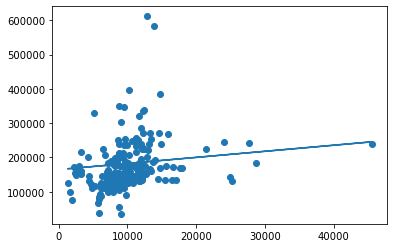

In [16]:
plt.scatter(test_x, test_y)
plt.plot(test_x, predicted_y)